In [90]:
import numpy as np
import math
from matplotlib import pyplot
from keras.datasets import mnist
from sklearn.preprocessing import minmax_scale

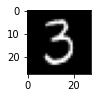

In [91]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Show example
pyplot.subplot(330 + 1)
pyplot.imshow(train_X[50], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [92]:
# Helper functions

def relu(x):
  return np.maximum(0, x)

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def calc_cost(result, expected):
  cost = 0
  for result, expected in zip(result, expected):
    cost += np.square(result - expected)
  return cost

In [93]:
class Layer:
  def __init__(self, in_size, out_size, activation_function="relu"):
    self.in_size = in_size
    self.out_size = out_size

    self.weights = np.random.uniform(-1, 1, (self.in_size, self.out_size))
    self.biases = np.random.uniform(-100, 100, (self.in_size, self.out_size))

  def activate(self, input):
    output = []

    for output_index in range(self.out_size):
      weights = self.weights[output_index]
      biases = self.biases[output_index]
      activation_value = 0

      for input_index in range(self.in_size):
        activation_value += (input[input_index] * weights[output_index]) + biases[output_index]
        
      output.append(sigmoid(activation_value))

    return output


In [94]:
class Network:
  def __init__(self, layers):
    self.layers = layers
    self.neurons = []

  # Set fit_size to len(x) to train on full dataset
  # Ive got a shitty laptop and it would take too long.
  def fit(self, x, y, fit_size=100):
    for item_index in range(fit_size):
      # Take in train x and minmax for 0.0 to 1.0
      curr_train_x = np.array(train_X[item_index]).flatten()
      curr_train_x = minmax_scale(curr_train_x, feature_range=(0,1), axis=0)
      
      # Neuron storage
      neurons = [ curr_train_x ]

      # Turn train y into same shape as output
      curr_train_y = [0.0] * 10
      curr_train_y[train_y[item_index] - 1] = 1.0

      # Apply layers of the network to data
      for layer_index in range(len(self.layers)):
        curr_layer = self.layers[layer_index]
        curr_neuron = neurons[layer_index]

        activation_result = curr_layer.activate(curr_neuron)
        cost = calc_cost(activation_result, curr_train_y)
        print('current cost:', cost)
        
        neurons.append(activation_result)

In [95]:
# Build and fit network.

my_net = Network([
  Layer(784, 16),
  Layer(16, 16),
  Layer(16, 10)
])

my_net.fit(train_X, train_y)

print('Complete!')


---
cost 6.0
---
---
cost 4.0
---
---
cost 8.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 4.0
---
---
cost 6.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 4.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 4.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 4.0
---
---
cost 6.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 4.0
---
---
cost 6.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 4.0
---
---
cost 8.0
---
---
cost 6.0
---
---
cost 4.0
---
---
cost 6.0
---
---
cost 6.0
---
---
cost 6.0
-

0.9933071490757153